In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:

import pandas as pd
# Load data
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Splitting data into features (X) and target (y)
X = train_data.drop(columns=["target", "last contact date"])
y = train_data["target"]



In [3]:
train_data.shape

(39211, 16)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
train_data.head(5)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [6]:
train_data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Identifying categorical and numerical columns
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]
numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combining preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)


In [8]:
import numpy as np
# Concatenate the training and validation data along rows (axis=0)
X_combined = np.vstack([X_train_preprocessed, X_val_preprocessed])

# Get the column names after transformation
# Combine the column names for both numerical and categorical features
columns = numerical_cols + list(preprocessor.transformers_[1][1].named_steps["onehot"].get_feature_names_out(categorical_cols))

In [9]:

# Create DataFrame with the combined data
df = pd.DataFrame(X_combined, columns=columns)

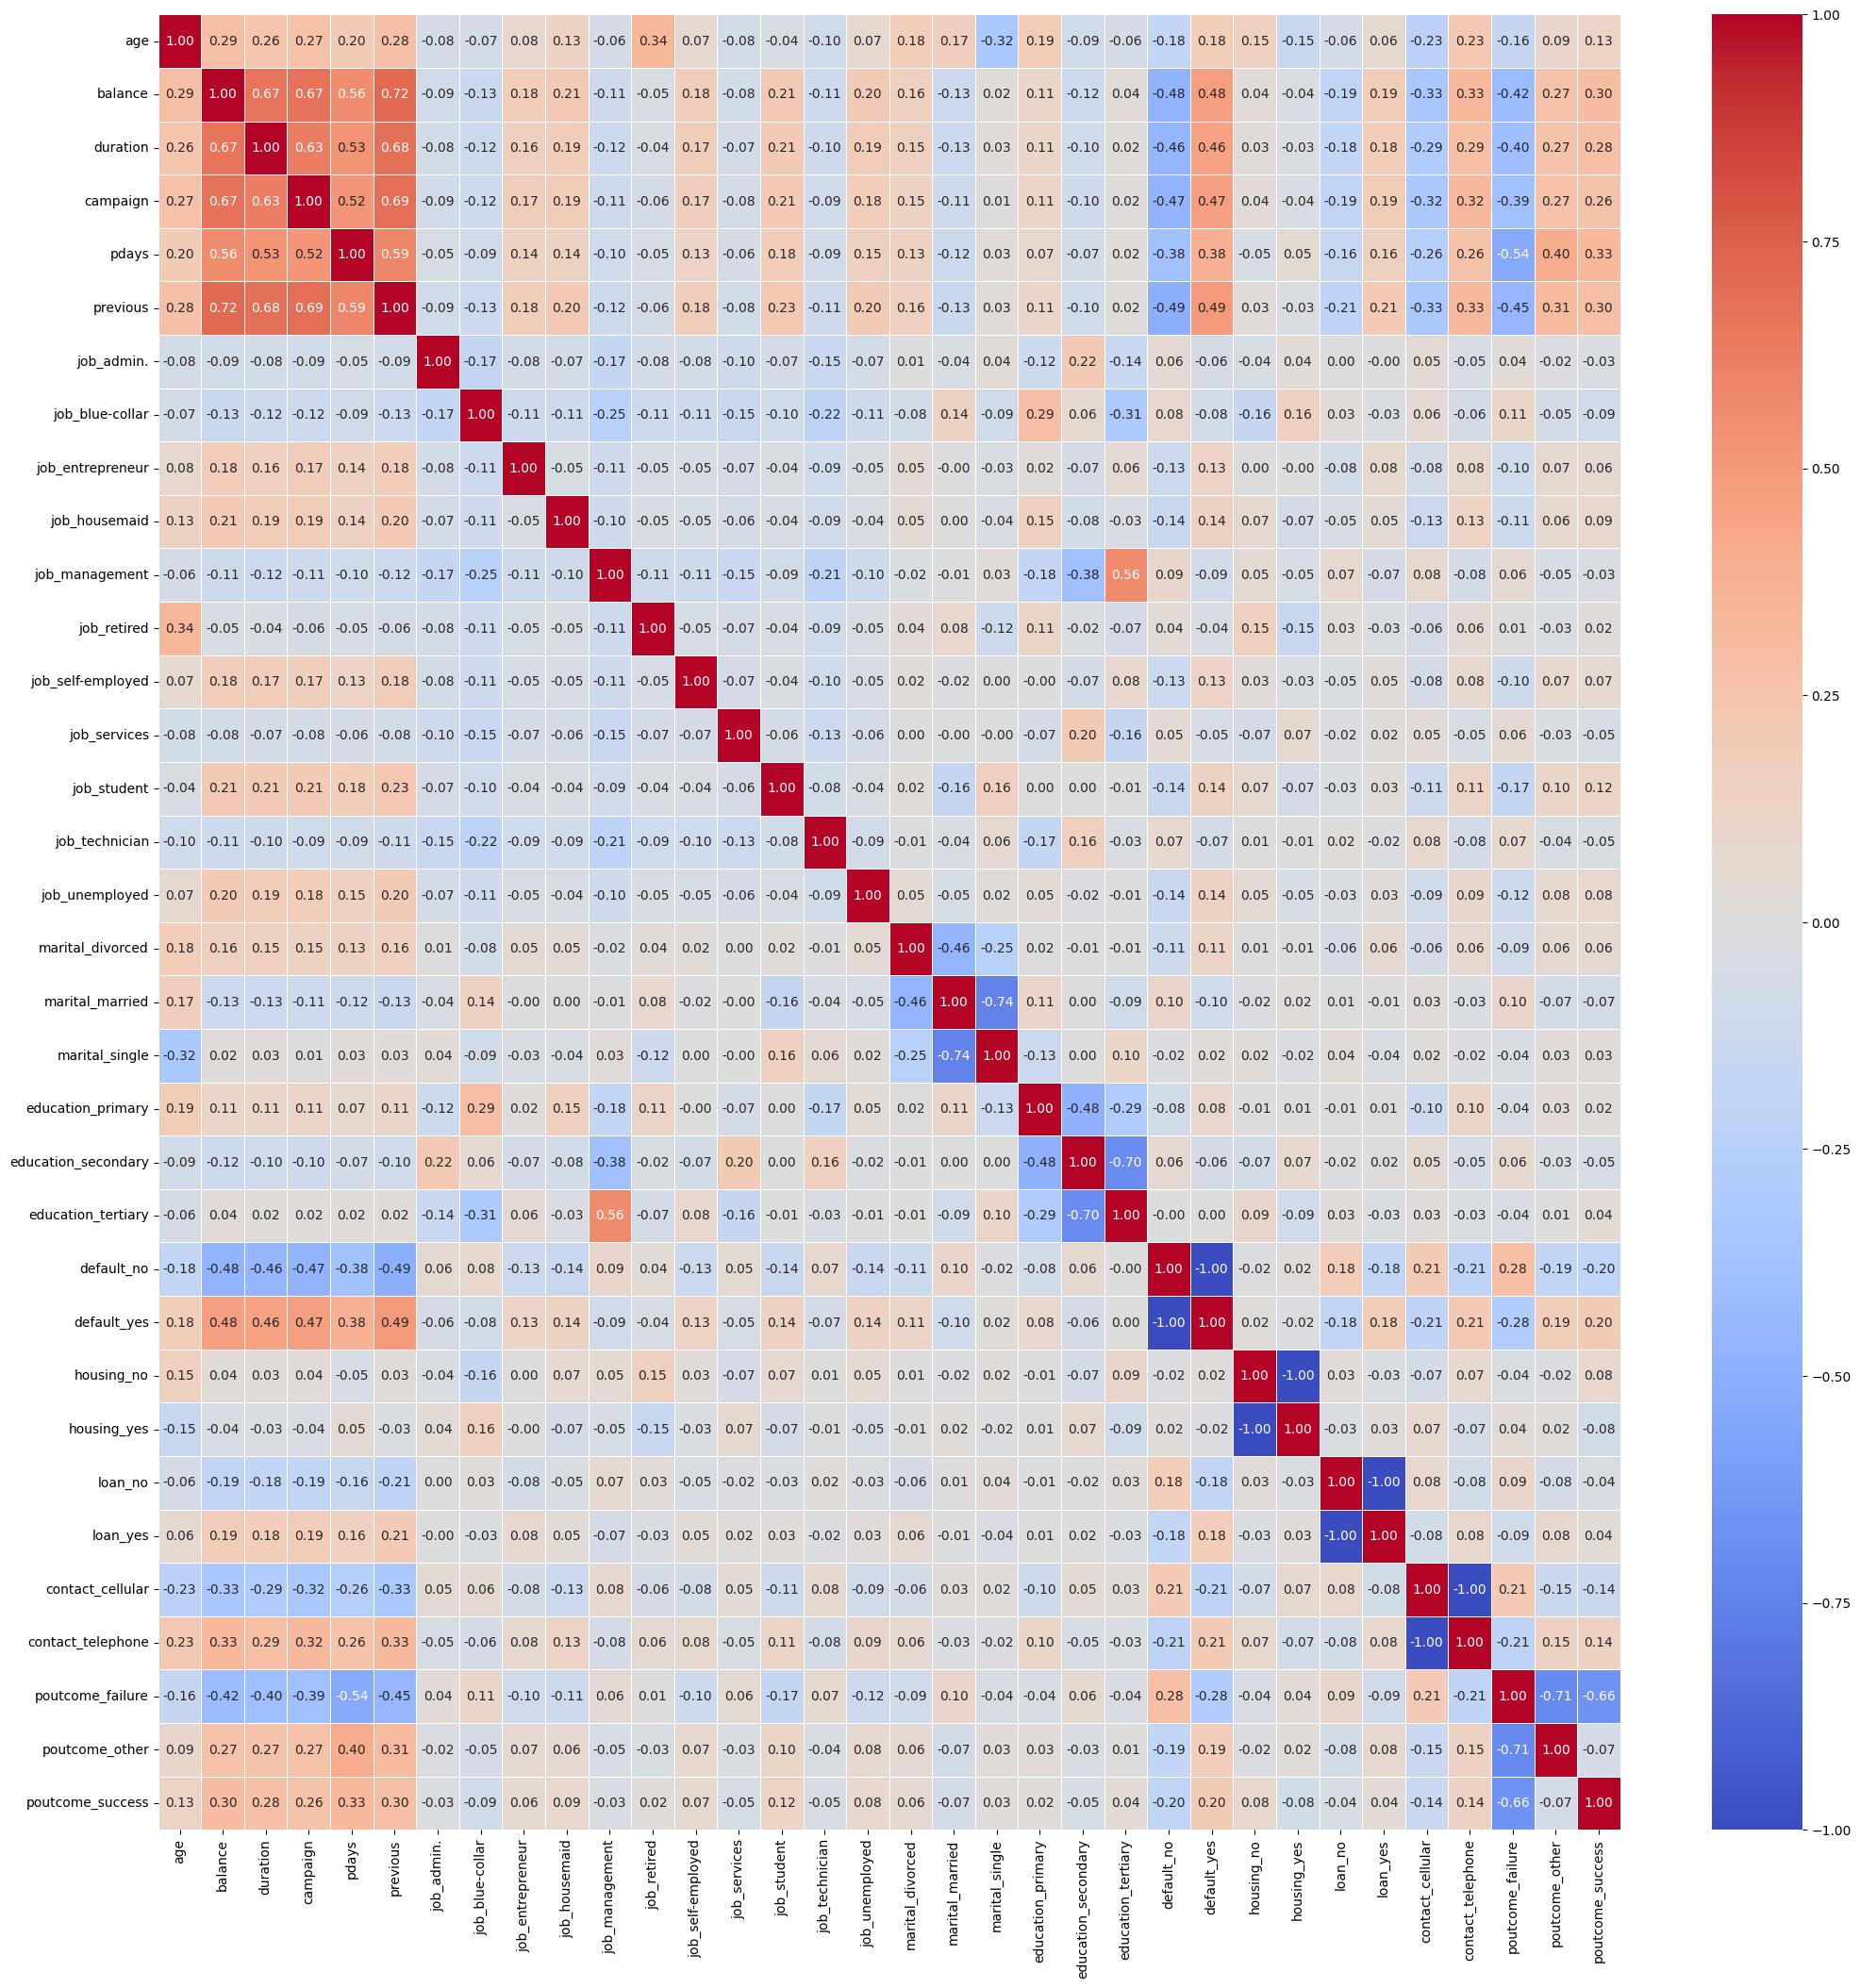

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=df.corr()
plt.figure(figsize=(25, 25))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()

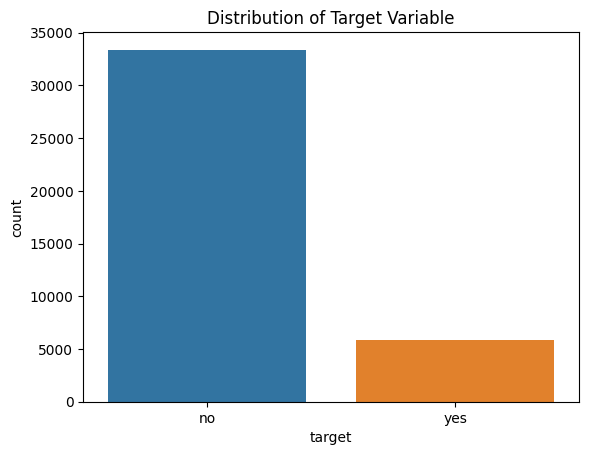

In [11]:
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()


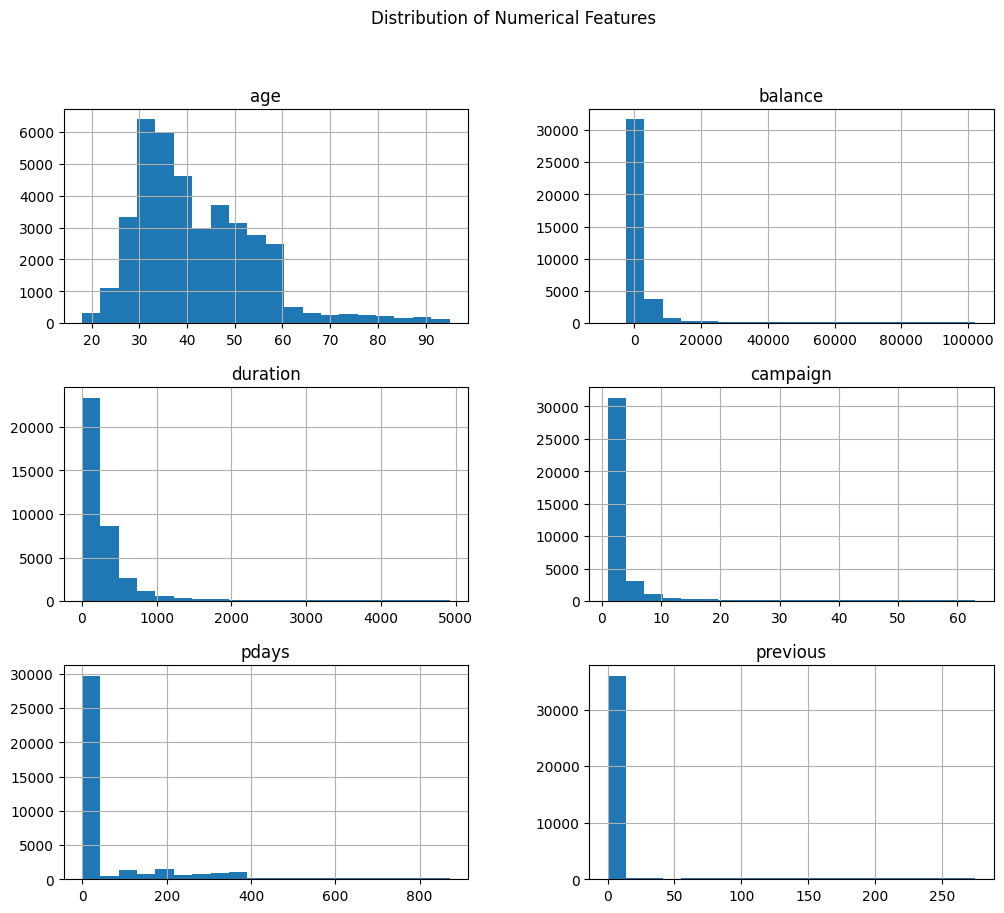

In [12]:
# Plotting the distribution of numerical columns
train_data[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()


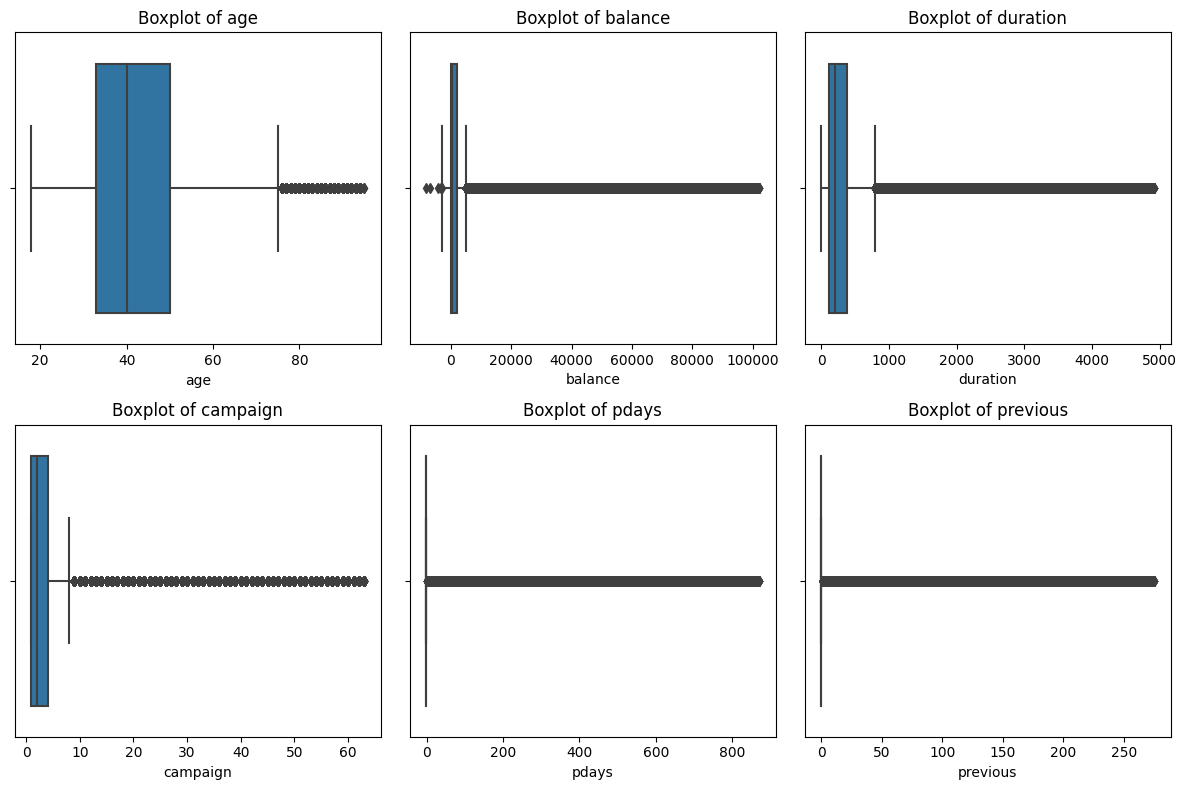

In [13]:
# Boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [14]:
########################################
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv") 
X = df.drop("target", axis=1) 
y = df['target'] 

from sklearn.dummy import DummyClassifier 
model = DummyClassifier().fit(X,y) 

X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
y_pred=model.predict(X_test)
 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), 
                           "target": y_pred}) 

submission.to_csv('submission.csv',index=False)

########################################


In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import warnings
# Load data
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Splitting data into features (X) and target (y)
X = train_data.drop(columns=["target", "last contact date"])
y = train_data["target"]

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identifying categorical and numerical columns
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]
numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combining preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Define the pipeline for the model only (no preprocessing here)
model = Pipeline(steps=[
    ("classifier", RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Refit the best model
best_model = grid_search.best_estimator_
best_model.fit(X_resampled, y_resampled)

# Validate the model
y_val_pred = best_model.predict(X_val_preprocessed)
f1_macro = f1_score(y_val, y_val_pred, average="macro")
print("Validation F1 Macro Score:", f1_macro)

# Prepare test data
X_test = test_data.drop(columns=["last contact date"])
X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions
test_predictions = best_model.predict(X_test_preprocessed)

# Create submission file
submission = pd.DataFrame({"id": test_data.index, "target": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Validation F1 Macro Score: 0.7258702148487892
Submission file saved as 'submission.csv'



Classification Report :
              precision    recall  f1-score   support

          no       0.93      0.90      0.91      6677
         yes       0.50      0.59      0.54      1166

    accuracy                           0.85      7843
   macro avg       0.71      0.74      0.73      7843
weighted avg       0.86      0.85      0.86      7843



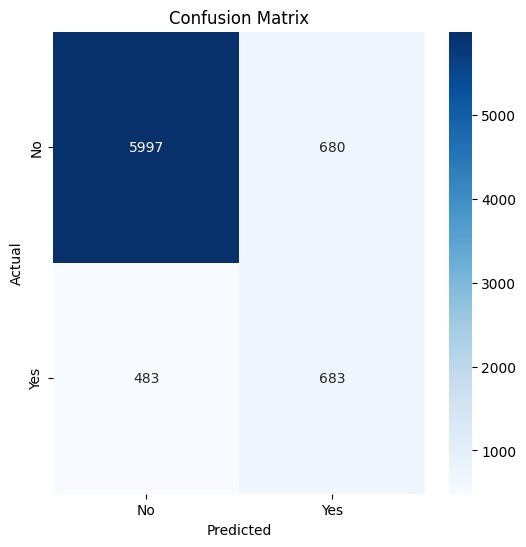

In [16]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Print the classification report
print("\nClassification Report :")
print(classification_report(y_val, y_val_pred))



# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Load data
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Splitting data into features (X) and target (y)
X = train_data.drop(columns=["target", "last contact date"])
y = train_data["target"]

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identifying categorical and numerical columns
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]
numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combining preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Perceptron": Perceptron(random_state=42),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    "Decision Tree": {
        "classifier__max_depth": [10, 20, None],
        "classifier__min_samples_split": [2, 5, 10]
    },
    "Naive Bayes": {},  # Naive Bayes doesn't require hyperparameter tuning for now
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [10, 20, None],
        "classifier__min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10],
        "classifier__solver": ["liblinear", "lbfgs"]
    },
    "Perceptron": {
        "classifier__max_iter": [1000, 2000],
        "classifier__alpha": [0.0001, 0.001]
    },
    "Ridge Classifier": {
        "classifier__alpha": [0.1, 1, 10]
    },
    "SGD Classifier": {
        "classifier__loss": ["log", "hinge"],
        "classifier__alpha": [0.0001, 0.001],
        "classifier__max_iter": [1000, 2000]
    },
    "SVM": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"]
    }
}

# Iterate over classifiers, tune hyperparameters, and evaluate with cross-validation
best_model = None
best_f1_score = 0
best_classifier = None
best_params = None

for model_name, classifier in classifiers.items():
    # Create a pipeline for each classifier
    model = Pipeline(steps=[("classifier", classifier)])
    
    # Define grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="f1_macro", n_jobs=-1)
    
    # Fit the model with GridSearchCV
    grid_search.fit(X_resampled, y_resampled)
    
    # Evaluate the best model
    f1_macro = grid_search.best_score_
    print(f"Model: {model_name}, Best F1 Macro Score: {f1_macro}")
    
    # Update the best model if necessary
    if f1_macro > best_f1_score:
        best_f1_score = f1_macro
        best_model = grid_search.best_estimator_
        best_classifier = model_name
        best_params = grid_search.best_params_

# Output the best model and parameters
print("\nBest Model:", best_classifier)
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_f1_score)

# Retrain the best model on the full resampled training set
best_model.fit(X_resampled, y_resampled)

# Validate the model
y_val_pred = best_model.predict(X_val_preprocessed)
f1_macro = f1_score(y_val, y_val_pred, average="macro")
print("Validation F1 Macro Score with Best Model:", f1_macro)

# Prepare test data
X_test = test_data.drop(columns=["last contact date"])
X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions with the best model
test_predictions = best_model.predict(X_test_preprocessed)

# Create submission file
submission = pd.DataFrame({"id": test_data.index, "target": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")


Model: Decision Tree, Best F1 Macro Score: 0.8599257182835368
Model: Naive Bayes, Best F1 Macro Score: 0.6630318062287838
Model: Random Forest, Best F1 Macro Score: 0.9021161615387243
Model: Logistic Regression, Best F1 Macro Score: 0.7693695908417701
Model: Perceptron, Best F1 Macro Score: 0.6550765020461574
Model: Ridge Classifier, Best F1 Macro Score: 0.7287192354452203


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

Model: SGD Classifier, Best F1 Macro Score: 0.793992599390134
Model: SVM, Best F1 Macro Score: 0.8543918967832695

Best Model: Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 Macro Score: 0.9021161615387243
Validation F1 Macro Score with Best Model: 0.7258702148487892
Submission file saved as 'submission.csv'



Classification Report :
              precision    recall  f1-score   support

          no       0.93      0.90      0.91      6677
         yes       0.50      0.59      0.54      1166

    accuracy                           0.85      7843
   macro avg       0.71      0.74      0.73      7843
weighted avg       0.86      0.85      0.86      7843



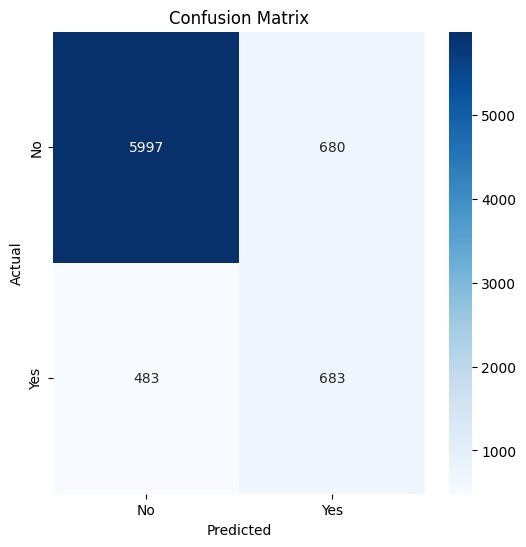

In [18]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Print the classification report
print("\nClassification Report :")
print(classification_report(y_val, y_val_pred))



# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
